In [2]:
import pandas as pd
import numpy as np
from pybedtools import BedTool

In [3]:
store = pd.HDFStore("../storage/encode_overlaps.hdf")
store_repeat = pd.HDFStore("../storage/repeatmasker_staging.hdf")

In [4]:
store.keys()

['/filtered_hg19_DNase_H3K27ac_FANTOM_overlapped',
 '/filtered_hg19_DNase_H3K27ac_FANTOM_overlapped_bed']

In [5]:
store_repeat.keys()

['/DNA',
 '/DNA_Kolobok',
 '/DNA_Kolobok_bed',
 '/DNA_MULE_MuDR',
 '/DNA_MULE_MuDR_bed',
 '/DNA_Merlin',
 '/DNA_Merlin_bed',
 '/DNA_PIF_Harbinger',
 '/DNA_PIF_Harbinger_bed',
 '/DNA_PiggyBac',
 '/DNA_PiggyBac_bed',
 '/DNA_TcMar',
 '/DNA_TcMar_Mariner',
 '/DNA_TcMar_Mariner_bed',
 '/DNA_TcMar_Pogo',
 '/DNA_TcMar_Pogo_bed',
 '/DNA_TcMar_Tc1',
 '/DNA_TcMar_Tc1_bed',
 '/DNA_TcMar_Tc2',
 '/DNA_TcMar_Tc2_bed',
 '/DNA_TcMar_Tigger',
 '/DNA_TcMar_Tigger_bed',
 '/DNA_TcMar_bed',
 '/DNA_TcMar_qm',
 '/DNA_TcMar_qm_bed',
 '/DNA_bed',
 '/DNA_hAT',
 '/DNA_hAT_Ac',
 '/DNA_hAT_Ac_bed',
 '/DNA_hAT_Blackjack',
 '/DNA_hAT_Blackjack_bed',
 '/DNA_hAT_Charlie',
 '/DNA_hAT_Charlie_bed',
 '/DNA_hAT_Tag1',
 '/DNA_hAT_Tag1_bed',
 '/DNA_hAT_Tip100',
 '/DNA_hAT_Tip100_bed',
 '/DNA_hAT_Tip100_qm',
 '/DNA_hAT_Tip100_qm_bed',
 '/DNA_hAT_bed',
 '/DNA_hAT_qm',
 '/DNA_hAT_qm_bed',
 '/DNA_qm',
 '/DNA_qm_PiggyBac_qm',
 '/DNA_qm_PiggyBac_qm_bed',
 '/DNA_qm_bed',
 '/DNA_qm_hAT_Tip100_qm',
 '/DNA_qm_hAT_Tip100_qm_bed',
 '/L

In [6]:
store.close()
store_repeat.close()

In [7]:
encode_metadata = pd.read_hdf("../storage/encode_staging.hdf", "encode_metadata")

In [8]:
encode_metadata.query("assembly == 'hg19' & biosample_type=='immortalized cell line'")['biosample_term_name'].unique()

array(['T47D', 'Daoy', 'HL-60', 'A549', 'RPMI8226', 'K562', 'HeLa-S3',
       'Jurkat', 'Caki2', 'KBM-7', 'Karpas-422', 'GM06990', 'NCI-H226',
       'GM12878', 'HCT116', 'MG63', 'HS-27A', 'HS-5', 'BE2C', 'WI38',
       'HepG2', 'M059J', 'WERI-Rb-1', 'MCF-7', 'LHCN-M2',
       'LNCaP clone FGC', 'PC-9', 'RCC 7860', 'DND-41', 'MM.1S', 'GM12864',
       'CMK', 'GM12865', 'OCI-LY7', 'HT-29', 'Panc1', 'A673', 'SK-N-SH',
       'G401', 'ACHN', 'Loucy', 'SK-N-MC', 'NAMALWA', 'SJSA1', 'NT2/D1',
       'RPMI-7951', 'PC-3', 'NB4', 'Caco-2', 'A172'], dtype=object)

In [9]:
encode_metadata.query("assembly == 'hg19' & biosample_term_name == 'K562' & method=='H3K27ac'")

,accession,assembly,biosample_term_id,biosample_term_name,biosample_type,description,developmental_slims,encyclopedia_version,month_released,organ_slims,organism,system_slims,bed_filename,bed_filepath,merged,method
170,ENCSR903CEC,hg19,EFO:0002067,K562,immortalized cell line,Enhancer-like regions using H3K27ac-only for K562,[],3,"August, 2016",[],/organisms/human/,[],ENCFF250DSF.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,H3K27ac
204,ENCSR219XCK,hg19,EFO:0002067,K562,immortalized cell line,Enhancer-like regions using H3K27ac-only for L...,[],3,"August, 2016",[],/organisms/human/,[],ENCFF371JNQ.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,H3K27ac


In [10]:
encode_bed = BedTool("../download/ENCODE/ENCSR903CEC/files/ENCFF250DSF/ENCFF250DSF.bed.gz")

In [11]:
repeat_bed_df = pd.read_hdf("../storage/repeatmasker_staging.hdf", "SINE_MIR_bed")
repeat_bed = BedTool().from_dataframe(repeat_bed_df)

In [12]:
encode_bed.head()

chr7	106206757	106212313	Distal-Prediction-1	1	.	106207512	106212313	255,205,0
 chr2	33141168	33141802	Distal-Prediction-2	1	.	33141168	33141802	255,205,0
 chr19	52047589	52056214	Distal-Prediction-3	1	.	52048957	52053741	255,205,0
 chr6	159273426	159276316	Distal-Prediction-4	1	.	159273426	159276316	255,205,0
 chr10	74078831	74083775	Distal-Prediction-5	1	.	74079445	74083775	255,205,0
 chr18	3620903	3627615	Distal-Prediction-6	1	.	3620903	3626780	255,205,0
 chr1	26447785	26455587	Distal-Prediction-7	1	.	26450850	26455587	255,205,0
 chr11	75244071	75250880	Distal-Prediction-8	1	.	75244560	75246987	255,205,0
 chr1	26945615	26949271	Distal-Prediction-9	1	.	26947061	26948770	255,205,0
 chr1	145454000	145457861	Distal-Prediction-10	1	.	145454000	145457861	255,205,0
 

In [13]:
encode_bed.count()

33082

In [14]:
repeat_bed.count()

594372

In [15]:
encode_bed_df = encode_bed.to_dataframe()

In [16]:
def compute_centers(df):
    df['centered_locus'] = round(
        (df['end'] - df['start'])/2 
        + df['start']).astype(int)

In [17]:
compute_centers(encode_bed_df)

In [18]:
encode_bed_cores_df = encode_bed_df.copy()
encode_bed_cores_df['start'] = encode_bed_cores_df['centered_locus']
encode_bed_cores_df['end'] = encode_bed_cores_df['centered_locus']

In [19]:
encode_bed_cores = BedTool().from_dataframe(encode_bed_cores_df[['chrom', 'start', 'end', 'name', 'score', 'strand']])

In [20]:
encode_bed_cores.count()

33082

In [21]:
#MIR-enhancers: core of enhancer in MIR
core_intersection = encode_bed_cores.intersect(repeat_bed)

In [22]:
core_intersection.count()

975

In [23]:
core_intersection.head()

chr10	74081303	74081303	Distal-Prediction-5	1	.
 chr20	353506	353506	Distal-Prediction-15	1	.
 chr3	177076814	177076814	Distal-Prediction-24	1	.
 chr2	100908420	100908420	Distal-Prediction-29	1	.
 chr3	5471120	5471120	Distal-Prediction-55	1	.
 chr20	52239227	52239227	Distal-Prediction-177	1	.
 chr3	195854460	195854460	Distal-Prediction-251	1	.
 chr7	2059134	2059134	Distal-Prediction-272	1	.
 chr9	69013147	69013147	Distal-Prediction-304	1	.
 chr20	30294232	30294232	Distal-Prediction-341	1	.
 

In [24]:
# null model MIR-enhancers
shuffled_encode_bed_cores = encode_bed_cores.shuffle(genome='hg19')
core_null_model_intersection = shuffled_encode_bed_cores.intersect(repeat_bed)

In [25]:
core_null_model_intersection.count()

884

In [85]:
# density
# assuming expected number of MIR-enhancers as
# average genome-wide density of enhancers (enhancers/bp) * total bp length of alla MIRs
encode_bed_df['size'] = encode_bed_df['end'] - encode_bed_df['start']
enhancers_density = len(encode_bed_df['size']) /  encode_bed_df['size'].sum()
repeat_bed_df['size'] = repeat_bed_df['end'] - repeat_bed_df['start']
repeat_len = repeat_bed_df['size'].sum()

In [86]:
len(encode_bed_df) 

33082

In [87]:
encode_bed_df['size'].sum()

47003972

In [88]:
47003972/3.3e19 * repeat_len

0.00012067342835697649

In [89]:
#coverage = encode_bed.genome_coverage(genome='hg19')

In [90]:
print(enhancers_density, repeat_len, enhancers_density*repeat_len)

0.000703812860751 84720992 59627.7237452


In [28]:
repeat_mean_size = repeat_bed_df['size'].mean()

In [29]:
def compute_size(row, prefix=None):
    col_name = prefix + '_name' if prefix else 'name'
    if row[col_name] == '.':
        return 0
    col_end = prefix + '_end' if prefix else 'end'
    col_start = prefix + '_start' if prefix else 'start'
    size = abs(row[col_end] - row[col_start])
    return size

def mean_size(bed):
    sample_df = bed.to_dataframe()
    sample_df['size'] = sample_df.apply(lambda row: compute_size(row), axis=1)
    return int(round(sample_df[['size']].mean()))

def build_random_overlap(bed, intervals_size, intervals_num, min_overlap, assembly, df_columns, idx):
    empty_bed = BedTool()
    random_bed = empty_bed.random(l=intervals_size, n=intervals_num,
                                  genome=assembly)
    row_array = [idx, bed.intersect(random_bed, f=min_overlap).count()]
    return pd.DataFrame([row_array], columns=df_columns)

def build_shuffled_overlap(bed, bed_overlap_with, min_overlap, assembly, df_columns, idx):
    random_bed = bed_overlap_with.shuffle(genome=assembly, chrom=False)
    row_array = [idx, bed.intersect(random_bed, f=min_overlap).count()]
    return pd.DataFrame([row_array], columns=df_columns)

In [30]:
from joblib import Parallel, delayed
import multiprocessing

def create_random_overlap_distribution_parallelized(bed, bed_overlap_with, assembly, min_overlap, 
                                                    samples_num,strategy='random'):
    num_cores = multiprocessing.cpu_count()

    intervals_size = mean_size(bed_overlap_with)
    intervals_num = bed_overlap_with.count()
    columns = ['sample_num', 'size']

    if strategy == 'shuffle':
        df_list = Parallel(n_jobs=num_cores)(delayed(build_shuffled_overlap)
                                             (bed, bed_overlap_with, min_overlap, assembly, columns, i)
                                             for i in range(0, samples_num))
    else:
        df_list = Parallel(n_jobs=num_cores)(delayed(build_random_overlap)
                                             (bed, intervals_size, intervals_num, min_overlap, assembly, columns, i)
                                             for i in range(0, samples_num))
    return pd.concat(df_list)

In [31]:
test_df = create_random_overlap_distribution_parallelized(encode_bed_cores, repeat_bed, 'hg19',
                                                         1e-09, 100)

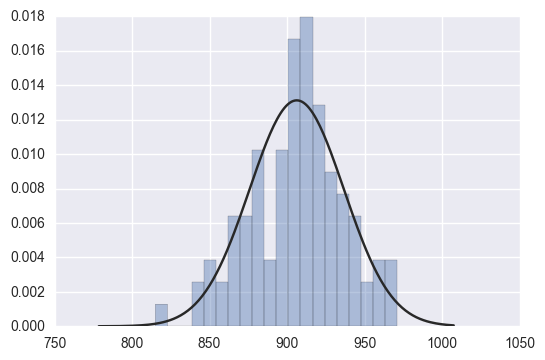

In [32]:
import seaborn as sns
%matplotlib inline
import scipy.stats as st
sns.distplot(test_df[['size']], kde=False, fit=st.norm, bins=20)

In [33]:
z_score =(core_intersection.count() - np.mean(test_df['size']))/np.std(test_df['size'])
print(z_score)

2.261751721256639


In [34]:
import scipy.stats as st
st.norm.ppf(.95)
st.norm.cdf(z_score)

0.98814362638964748

In [35]:
p_values = st.norm.sf(abs(z_score))
p_values

0.011856373610352477

In [37]:
st.ttest_1samp(a= test_df[['size']], popmean= core_intersection.count())

Ttest_1sampResult(statistic=array([-22.50414549]), pvalue=array([  1.02921265e-40]))

In [38]:
st.ttest_1samp(a= test_df[['size']], popmean= np.mean(test_df[['size']]))

Ttest_1sampResult(statistic=size    0.0
dtype: float64, pvalue=array([ 1.]))

In [39]:
chi2, p = st.chisquare( test_df[['size']],core_intersection.count() )
msg = "Test Statistic: {}\np-value: {}"
print( msg.format( chi2, p ) )

Test Statistic: [ 580.04717949]
p-value: [  4.10760774e-69]


In [47]:
encode_bed_cores.sort().fisher(repeat_bed.sort(), f=1e-09, genome='hg19')

<FisherOutput at 4789507464>
# Number of query intervals: 33082
# Number of db intervals: 593161
# Number of overlaps: 975
# Number of possible intervals (estimated): 21406952
# phyper(975 - 1, 33082, 21406952 - 33082, 593161, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 975          | 32107        |
# not in -a | 592186       | 20781684     |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
0.97486	0.027129	0.051838	1.066

In [56]:
df_reldist = pd.DataFrame(encode_bed_cores.sort().reldist(repeat_bed.sort()))
df_reldist.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
count,642.000,682.000,721.000,750.000,742.000,695.000,685.000,718.000,694.000,676.00,...,641.000,602.000,650.00,606.000,655.00,632.000,652.00,660.00,578.000,3.0
fraction,0.019,0.021,0.022,0.023,0.022,0.021,0.021,0.022,0.021,0.02,...,0.019,0.018,0.02,0.018,0.02,0.019,0.02,0.02,0.017,0.0
reldist,0.000,0.010,0.020,0.030,0.040,0.050,0.060,0.070,0.080,0.09,...,0.410,0.420,0.43,0.440,0.45,0.460,0.47,0.48,0.490,0.5
total,33069.000,33069.000,33069.000,33069.000,33069.000,33069.000,33069.000,33069.000,33069.000,33069.00,...,33069.000,33069.000,33069.00,33069.000,33069.00,33069.000,33069.00,33069.00,33069.000,33069.0


In [57]:
df_reldist_random = pd.DataFrame(encode_bed_cores.sort().reldist(repeat_bed.shuffle(genome='hg19', chrom=False).sort()))

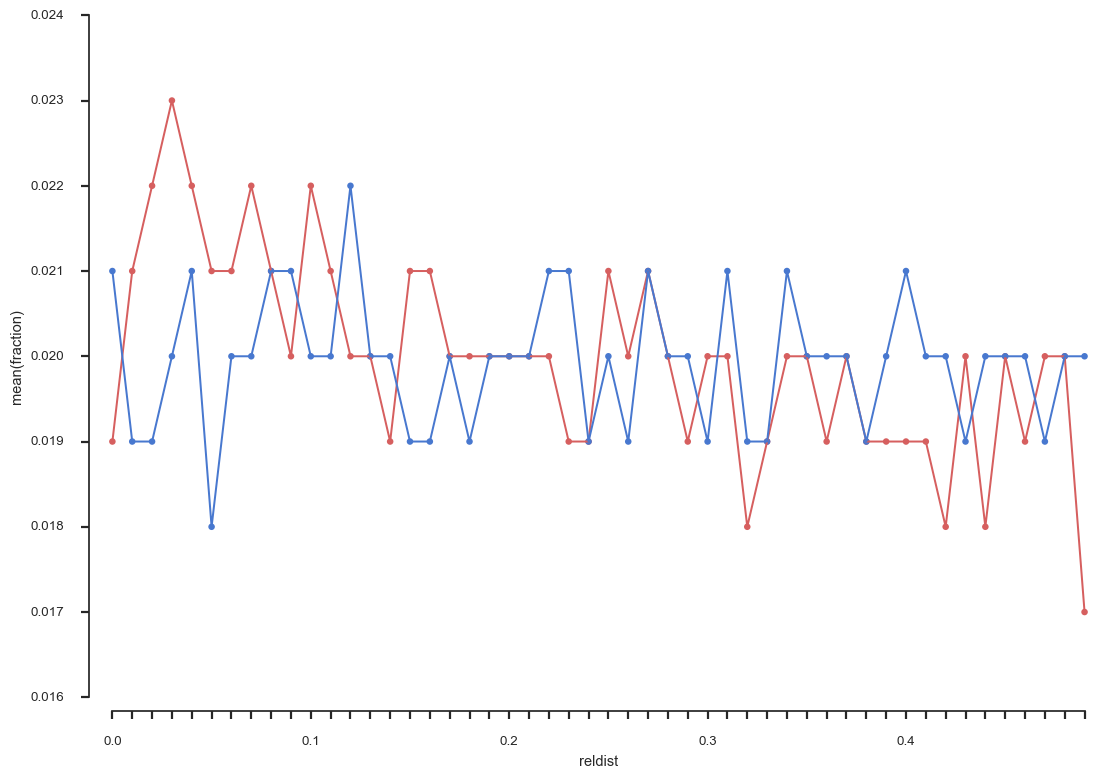

In [60]:
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})

g1 = sns.pointplot(x='reldist', y='fraction', data=df_reldist[0:50],  color='r')
g2 = sns.pointplot(x='reldist', y='fraction', data=df_reldist_random[0:50], color='b')

sns.despine(offset=10, trim=True)
#plot.set_yscale("log")
#df_reldist[['reldist','fraction']].plot()
for ind, label in enumerate(g1.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

In [73]:
#compute "enhancers regions" as +/- 4kb from enhancer cores
encode_bed_slop = encode_bed_cores.slop(genome='hg19', b=4000)

In [93]:
encode_bed_cores.sort().head()

chr1	118595	118595	Distal-Prediction-10810	1	.
 chr1	138794	138794	Proximal-Prediction-8451	1	.
 chr1	229554	229554	Proximal-Prediction-13463	1	.
 chr1	235802	235802	Proximal-Prediction-6494	1	.
 chr1	713934	713934	Proximal-Prediction-2259	1	.
 chr1	761154	761154	Proximal-Prediction-9261	1	.
 chr1	762601	762601	Proximal-Prediction-1564	1	.
 chr1	765589	765589	Proximal-Prediction-15111	1	.
 chr1	840032	840032	Proximal-Prediction-13579	1	.
 chr1	894288	894288	Proximal-Prediction-8969	1	.
 

In [91]:
encode_bed_slop.sort().head()

chr1	114595	122595	Distal-Prediction-10810	1	.
 chr1	134794	142794	Proximal-Prediction-8451	1	.
 chr1	225554	233554	Proximal-Prediction-13463	1	.
 chr1	231802	239802	Proximal-Prediction-6494	1	.
 chr1	709934	717934	Proximal-Prediction-2259	1	.
 chr1	757154	765154	Proximal-Prediction-9261	1	.
 chr1	758601	766601	Proximal-Prediction-1564	1	.
 chr1	761589	769589	Proximal-Prediction-15111	1	.
 chr1	836032	844032	Proximal-Prediction-13579	1	.
 chr1	890288	898288	Proximal-Prediction-8969	1	.
 

In [116]:
#enhancer-MIRs: MIR in +/- 4kb from the core of an enhancer
region_intersection = repeat_bed.intersect(encode_bed_slop, f=1, u=True)

In [117]:
region_intersection.count()

54573

In [109]:
# null model enhancers-MIRs
shuffled_repeat = repeat_bed.shuffle(genome='hg19')

In [102]:
shuffled_repeat.count() == repeat_bed.count()

True

In [118]:
null_model_intersection = shuffled_repeat.intersect(encode_bed_slop, f=1, u=True)

In [119]:
null_model_intersection.count()

40525